#  Data to corrolate

 - Political affiliation by State and City
 - Polpulations by US city with a break down on Income and Ethnicity
 - Crime and shootings based on  state
 - Gun legislation based on state

#  Assumptions
  - Data polled all has the same Years of reporting
  - Assuming the Police forces did not hire or change hands during the years of reporting
  - Try to gain data for one presidential term to assure consistency in Political party in the states
  - US data can be predominately Republican focused or Democratic focused, need to get unbais datasets
  - There is generally no way to determine if a criminal is a legal or illegal citizen until after they have been killed

  The goal of this evaluation is to determine a corrolation between political party, and the laws associated with that party
  to see if a specific party policies net more or less gun violence at the hands of law enforcement.

 Some of the Data located from the US government was in the format of xlsx and thus needed to install the library to
 be able to read the excel file and its sheets. used library xlrd

## Data References
  https://crimeresearch.org/data/
  https://www.nytimes.com/elections/2016/results/
  https://www.theguardian.com/world/interactive/2013/jan/15/gun-laws-united-states
  https://www.gunstocarry.com/
  https://www.Data.gov
  https://data.census.gov (can build a census dataset by selecting the state, county and city/rural area)
  https://libguides.princeton.edu/politics/american/states

In [388]:
#  connect libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [ ]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea

#  District of Columbia is not a State but the Democrats want it to be declared as a state because there are two senators
#  in DC which could swing the voting majority always to Democrat.  Also, Puerto Rico is sought by the Democrats to be 
#  declared a state but it actually resides in Mexico. 

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

## Political Distributions Data

United States are made up electroial seats with a different number per state. There are two houses in the political government, that being the Senate and the House with different seats and each. Generally, the States are responsible for their own governance and laws with the Washington government resonsble for over reaching laws and country managment.  Blue States being Democratic held, while Red States being Republican, and color states being a a mixture of seats being held by either party.

Gun laws by State actually has a very nice website.  And many states require extensive training to even carry a firearm
As well, guns are registered prior to use and certain states restrict the use or certain guns.  Such as fully automatic 
assualt rifles.
For example in Chicogo they have very tough gun laws. 

In [7]:
#  Found a historical governer list which I can massage out the govern and the party affiliation.  Princeton has a wonderful 
#  listing of state based data
file_loc = "StateElections_Gub_2012_09_06_Public_Version.xlsx"

StatePolitics = pd.read_excel(file_loc,index_col=None, na_values=['NA'], usecols = "A,C,BS")
#  Filtered the incoming columns to focus on just the State, Year, governer and the party affliation

In [8]:
# Many of the columns are not needed for the analysis, we basically need to filter out just the years we are comparing the 
# shooting data for, those being 2013 - 2020.  So the State data we will be getting the State, Governer, Years and party
# affiliation where 1 is Democrat, -1 is Republican, and 0 is independent.  It might be interesting to determine if the 
# governer got a Senate seat which means he can adjust policy.

StatePolitics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         4600 non-null   object 
 1   year          4600 non-null   int64  
 2   govparty_b_2  3705 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 107.9+ KB


In [9]:
StatePolitics

#  Most of the State content pertains to the electorial assignment in the State.  We really only need the State, the year
#  filtered down to 2000 - 2016, the existing Senator and the party afilliation.  Within the states there are mid term elections
#  which can swing a state in certain directions based on the electroial ridings. so you get Blue or Red assignments in the 
#  state.  For this analysis will only take into account the political majority for the state, this is because often the 
#  majority always vote one particular way and thus we always have Blue or Red states and swing states in elections.

,state,year,govparty_b_2
0,Alabama,1925,NaN
1,Alabama,1926,NaN
2,Alabama,1927,NaN
3,Alabama,1928,NaN
4,Alabama,1929,NaN
...,...,...,...
4595,Wyoming,2012,NaN
4596,Wyoming,2013,NaN
4597,Wyoming,2014,NaN
4598,Wyoming,2015,NaN


In [10]:
#  Manipulate the StatePolitics dataset to only show the essentials and clean up the NAN records
#  Will change the headings to reflect that is actally in the Dataset for these columns and then add then clean up the data

# 
header = StatePolitics.iloc[0]
StatePolitics.columns = ['State', 'Year', 'Party']
StatePolitics

,State,Year,Party
0,Alabama,1925,NaN
1,Alabama,1926,NaN
2,Alabama,1927,NaN
3,Alabama,1928,NaN
4,Alabama,1929,NaN
...,...,...,...
4595,Wyoming,2012,NaN
4596,Wyoming,2013,NaN
4597,Wyoming,2014,NaN
4598,Wyoming,2015,NaN


In [11]:
#  Clean up the Columns which have NAN
StatePolitics.loc[(StatePolitics.Party == 1),'Party'] = 'D'  # Demacrat
StatePolitics.loc[(StatePolitics.Party == -1), 'Party'] = 'R'  # Republican

#  Convert States to their Abrviation and post to its own Column
StatePolitics['State Abv'] = StatePolitics['State'].map(us_state_abbrev)

In [32]:
#  Clean up the times when the Party did not have values (NAN)
StPolitics = StatePolitics.dropna()



In [55]:
newPol = StPolitics[StPolitics["Year"].between(2011,2016)]

newPol

,State,Year,Party,State Abv
86,Alabama,2011,R,AL
178,Alaska,2011,R,AK
270,Arizona,2011,R,AZ
362,Arkansas,2011,D,AR
454,California,2011,D,CA
546,Colorado,2011,D,CO
638,Connecticut,2011,D,CT
730,Delaware,2011,D,DE
822,Florida,2011,R,FL
914,Georgia,2011,R,GA


In [30]:
#  Determine Affiliation based on State
#  Need the average Party for the Years from 2000-2016

republic = newPol['Party'] == 'R'
democrat = newPol['Party'] == 'D'
independent = newPol['Party'] == 0

democrat.sum()

20

In [31]:
republic.sum()

29

In [67]:
#  We are going to make up a Dictionary from the Political Party DataFrame so we can reference it with our other DataFrames
#  Will bind State Abv as the Key and Party as Item

#  Setup a DataFrame with only the correct values
dfTemp = newPol.drop(columns=['State','Year'])

dfTemp.loc[(dfTemp.Party == 0),'Party'] = 'I'

#  Add Washington DC to the dictionary which is considered a state and has always been Democrat
temp = {'Party':'D','State Abv':'DC'}

dfTemp = dfTemp.append(temp,ignore_index = True)


In [94]:
list_index = dfTemp['State Abv'].values.tolist()
list_values = dfTemp['Party'].values.tolist()

dicParty = dict(zip(list_index,list_values))

#  R = Republican, D = Democrat, and I = Independent
dicParty

{'AL': 'R',
 'AK': 'R',
 'AZ': 'R',
 'AR': 'D',
 'CA': 'D',
 'CO': 'D',
 'CT': 'D',
 'DE': 'D',
 'FL': 'R',
 'GA': 'R',
 'HI': 'D',
 'ID': 'R',
 'IL': 'D',
 'IN': 'R',
 'IA': 'R',
 'KS': 'R',
 'KY': 'D',
 'LA': 'R',
 'ME': 'R',
 'MD': 'D',
 'MA': 'D',
 'MI': 'R',
 'MN': 'D',
 'MS': 'R',
 'MO': 'D',
 'MT': 'D',
 'NE': 'R',
 'NV': 'R',
 'NH': 'D',
 'NJ': 'R',
 'NM': 'R',
 'NY': 'D',
 'NC': 'D',
 'ND': 'R',
 'OH': 'R',
 'OK': 'R',
 'OR': 'D',
 'PA': 'R',
 'RI': 'I',
 'SC': 'R',
 'SD': 'R',
 'TN': 'R',
 'TX': 'R',
 'UT': 'R',
 'VT': 'D',
 'VA': 'R',
 'WA': 'D',
 'WV': 'D',
 'WI': 'R',
 'WY': 'R',
 'DC': 'D'}

## Demographic Data per state and city for the US

In [125]:
#  The intent is to look at how each State is distributed and what centers in the states have spefic crimes relating to
#  unrest, gang and poverty.  I found that the Census Breureua was pretty informative so I build out the data I needed

# looked at poverty by State, the goal is to determine if a specific political party is more prone to gun violence and 
# less considerate towards the welbeing of the people in the state.  

file_loc = 'state.xls'
poverty = pd.read_excel(file_loc, index_col=None, na_values=['NA'], usecols = "A,B,D,F,")

poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  51 non-null     object 
 1   3-year average (2016-2018) Percentage  51 non-null     float64
 2   2-year average (2015-2016) Percentage  51 non-null     float64
 3   2-year average (2017-2018) Percentage  51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [126]:
header = poverty.iloc[0]
poverty.columns = ['State', '2016-2018 avg', '2015-2016 avg', '2017-2018 avg']

#  strip out the value for all of the US as we are dealing with just the states
poverty['State'] = poverty['State'].str.strip('.')
poverty['State Abv'] = poverty['State'].map(us_state_abbrev)

poverty

,State,2016-2018 avg,2015-2016 avg,2017-2018 avg,State Abv
0,Alabama,16.0,16.3,15.6,AL
1,Alaska,12.2,10.9,12.6,AK
2,Arizona,14.4,16.6,13.2,AZ
3,Arkansas,15.5,16.1,15.4,AR
4,California,12.5,13.9,12.0,CA
5,Colorado,8.9,9.2,9.0,CO
6,Connecticut,9.9,9.5,10.4,CT
7,Delaware,9.6,11.3,8.1,DE
8,District of Columbia,14.9,16.5,14.3,DC
9,Florida,13.6,14.6,13.5,FL


In [127]:
poverty.describe()

#  The data is pretty close to each other, the real test will be when it gets grouped by party. 

,2016-2018 avg,2015-2016 avg,2017-2018 avg
count,51.000000,51.000000,51.000000
mean,12.033333,12.696078,11.796078
std,2.956191,2.982815,2.843024
min,6.400000,6.800000,6.600000
25%,10.100000,10.750000,10.050000
50%,11.500000,11.800000,11.400000
75%,13.850000,14.400000,13.300000
max,19.800000,20.100000,19.800000


In [207]:
#  This shows the precentage of average poverty by State
#  Could graph these values as well and compare them to the political party

#  Will need to combine the DataFrames so that we can Graph Poverty numbers by Party affiliation with each state.
#  Could do a grouping as the particular party and then graph in relation to the Group

#  We can map the Political party to the Poverty DataFrame to allow us to Graph based on affliation
polPoverty = poverty.drop(columns=['State'])
polPoverty['Party'] = polPoverty['State Abv'].map(dicParty)

polPoverty['2015-2018'] = (polPoverty['2016-2018 avg'] + polPoverty['2015-2016 avg'] + polPoverty['2017-2018 avg'])/3
polPoverty = polPoverty.drop(columns=['2016-2018 avg','2015-2016 avg','2017-2018 avg'])
polPoverty

,State Abv,Party,2015-2018
0,AL,R,15.966667
1,AK,R,11.900000
2,AZ,R,14.733333
3,AR,D,15.666667
4,CA,D,12.800000
5,CO,D,9.033333
6,CT,D,9.933333
7,DE,D,9.666667
8,DC,D,15.233333
9,FL,R,13.900000


In [208]:
#  Now we can build a line graph which relates the parties to the poverty levels
#  We will need to group the parties to get the best results

poverty_grouped = polPoverty.groupby('Party')

partyStates1 = polPoverty.groupby('Party')['2015-2018'].mean()
partyStates1



Party
D    11.365079
I    10.666667
R    12.813793
Name: 2015-2018, dtype: float64

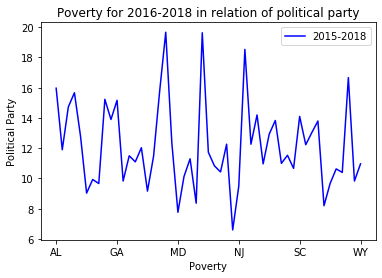

In [209]:
#  Want to organize the lines based on the political party and then map out the poverty on the same graph
#  This should clearly define if a party has a higher instance of poverty

ax=plt.gca()

polPoverty.plot(kind='line',x='State Abv', y='2015-2018', color='blue',ax=ax)

plt.xlabel('Poverty')
plt.ylabel('Political Party')
plt.title('Poverty for 2016-2018 in relation of political party')
plt.show()


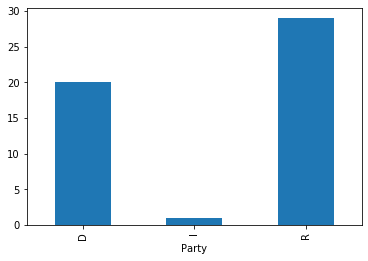

In [223]:
#  Bar Graph by Grouping


polPoverty.groupby('Party')['2015-2018'].nunique().plot.bar()
#polPoverty.groupby('Party')['2015-2018'].plot(ax=ax)
ax.set_xlabel('Party')
ax.set_ylabel('Poverty Percentage')

plt.show()


Police Shootings Data - organized by State and City

Found a very comprensive Spreadsheet with multiple worksheets pertaining to State  Data in relation to shootings.
https://crimeresearch.org  
John Lott

In [233]:
#  Connect to the respective sheets in the excel file exported from Data.gov website
excelKillings = pd.read_excel('MPVDatasetDownload.xlsx', sheet_name = '2013-2020 Police Killings', usecols = "B,C,D,I,M,R,S,T")

# Clean up Column naming
header = excelKillings.iloc[0]
excelKillings.columns = ['age', 'gender', 'race', 'state', 'cause', 'illness','armed','weapon']

#  Need to assure the Politics table has the appreviation for State as a column so it can be related to the Crime tables



In [229]:
#  Have a few columns with less than 8263 values, Suspect they are NAN
#  missing 10 in Gender
#  missing 102 in Age

#  In terms of percentages the missing values would be really low and we could negate those rows and not impact the Dataset 



In [234]:
excelKillings=excelKillings.dropna()
excelKillings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8145 entries, 0 to 8262
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      8145 non-null   object
 1   gender   8145 non-null   object
 2   race     8145 non-null   object
 3   state    8145 non-null   object
 4   cause    8145 non-null   object
 5   illness  8145 non-null   object
 6   armed    8145 non-null   object
 7   weapon   8145 non-null   object
dtypes: object(8)
memory usage: 572.7+ KB


In [237]:
#  We need to map the Political Party to the DataFrame so we can do comparisons based on Crime
excelKillings['party'] = excelKillings['state'].map(dicParty)
excelKillings

,age,gender,race,state,cause,illness,armed,weapon,party
0,62,Male,Unknown race,TN,Gunshot,Drug or alcohol use,Allegedly Armed,gun,R
1,48,Male,White,PA,Gunshot,No,Allegedly Armed,gun,R
2,34,Male,Hispanic,CA,Gunshot,No,Allegedly Armed,gun,D
3,26,Female,White,TX,Gunshot,No,Allegedly Armed,gun,R
4,57,Male,White,KY,Gunshot,No,Unclear,undetermined,D
...,...,...,...,...,...,...,...,...,...
8258,31,Male,Black,NE,Gunshot,Yes,Allegedly Armed,gun,R
8259,26,Male,Hispanic,CA,Gunshot,No,Allegedly Armed,gun,D
8260,21,Male,Hispanic,CO,Gunshot,No,Allegedly Armed,gun,D
8261,21,Male,White,WI,Gunshot,Drug or alcohol use,Allegedly Armed,gun,R


In [ ]:
#  Looks like a good dataset, lots of details we could pull out as Graphs.
#  Want to check the entried in each of the Columns to determine what I can do for graphs
#  Weapons used is of particular importance because based on the State there could be gun laws restricting public use,
#  but this will not deter those contemplating gun violence.

#  What do columns contain

In [238]:
#  What does armed contain
excelKillings.armed.unique()

array(['Allegedly Armed', 'Unclear',
       'Unarmed/Did Not Have an Actual Weapon', 'Vehicle'], dtype=object)

In [239]:
#  What does illness contain
excelKillings.illness.unique()

array(['Drug or alcohol use', 'No', 'Yes', 'Unknown', 'Unkown',
       'Unknown ', 'unknown'], dtype=object)

In [301]:
#  looks like there needs to be some consolidiation when it comes to the work 'unknown'  in illness

mask = excelKillings['illness'].str.contains('Unkown' , regex=True)
excelKillings.loc[mask,'illness'] ='unknown'

In [302]:
excelKillings.illness.unique()

array(['Drug or alcohol use', 'No', 'Yes', 'unknown'], dtype=object)

In [240]:
#  What does cause contain
excelKillings.cause.unique()

array(['Gunshot', 'Gunshot, Taser', 'Tasered', 'Physical Restraint',
       'Vehicle', 'Chemical agent/Pepper spray', 'Beaten', 'Taser',
       'Beaten/Bludgeoned with instrument', 'Other',
       'Gunshot, Beanbag Gun', 'Gunshot, Police Dog',
       'Gunshot, Bean Bag Gun', 'Gunshot, Pepper Spray', 'Bean bag',
       'Gunshot, Taser, Baton', 'Gunshot, Taser, Beanbag Shotgun',
       'Pepper Spray', 'Asphyxiated',
       'Gunshot, Unspecified Less Lethal Weapon', 'Physical restraint',
       'Taser, Baton', 'Bomb', 'Taser, Physical Restraint',
       'Baton, Pepper Spray, Physical Restraint', 'Gunshot, Vehicle',
       'Gunshot, Stabbed', 'Gunshot, Taser, Pepper spray',
       'Taser, Pepper Spray, Beaten', 'Taser, Beaten',
       'Taser, Pepper spray, beaten'], dtype=object)

In [296]:
#  cause also needs to have some cleanup as some entries are the same but spent different

mask = excelKillings['cause'].str.contains('Unknown weapon' , regex=True)
excelKillings.loc[mask,'cause'] ='unknown weapon'

In [298]:
excelKillings.cause.unique()

array(['Gunshot', 'Gunshot, Taser', 'Taser', 'Physical Restraint',
       'Vehicle', 'Chemical agent/Pepper spray', 'Beaten',
       'Beaten/Bludgeoned with instrument', 'Other',
       'Gunshot, Beanbag Gun', 'Gunshot, Police Dog', 'Beanbag Gun',
       'Gunshot, Pepper Spray', 'Gunshot, Taser, Baton',
       'Gunshot, Taser, Beanbag Shotgun', 'Pepper Spray', 'Asphyxiated',
       'Gunshot, Unspecified Less Lethal Weapon', 'Physical restraint',
       'Taser, Baton', 'Bomb', 'Taser, Physical Restraint',
       'Baton, Pepper Spray, Physical Restraint', 'Gunshot, Vehicle',
       'Gunshot, Stabbed', 'Gunshot, Taser, Pepper spray',
       'Taser, Pepper Spray, Beaten', 'Taser, Beaten'], dtype=object)

In [241]:
#  Lets look at what Weapon contains
excelKillings.weapon.unique()

array(['gun', 'undetermined', 'knife', 'sword', 'machete', 'unarmed',
       'toy weapon', 'Taser', 'vehicle', 'pellet gun', 'metal pipe',
       'vehicle and gun', 'hammer', 'unknown weapon', 'rock',
       'samurai sword', 'sharp object', 'baseball bat', 'gun and car',
       'gun and vehicle', 'shovel', 'pick-axe', 'screwdriver', 'BB gun',
       'scissors', 'meat cleaver', 'chair', 'unclear', 'chain', 'hatchet',
       'car, knife and mace', 'vehicle and machete', 'box cutter', 'ax',
       'crowbar', 'baseball bat and knife', 'toy', 'straight edge razor',
       'baton', 'Airsoft pistol', 'air pistol', 'wasp spray',
       'BB gun and vehicle', 'piece of wood', 'gun and knife',
       'garden tool', 'barstool', 'walking stick', 'wrench',
       'beer bottle', 'lawn mower blade', 'crossbow', 'metal object',
       'bow and arrow', 'lamp', 'glass shard', 'incendiary device',
       'pipe', 'pole and knife', 'Unknown weapon', 'lighter fluid',
       'pitchfork', 'gun and sword', 'tas

In [341]:
#  there are some similar responces in weapons, which resulted in a lot of surprising weapons
#  it sure looks like those which where shot where intending on doing harm based on the weapons found

#  Probably want to formalize some sort of grouping for the Weapons 

In [287]:
excelKillings.weapon.unique()

array(['gun', 'undetermined', 'knife', 'sword', 'machete', 'unarmed',
       'toy', 'Taser', 'vehicle', 'pellet gun', 'metal pipe',
       'gun and vehicle', 'hammer', 'unknown weapon', 'rock',
       'samurai sword', 'sharp object', 'baseball bat', 'shovel',
       'pick-axe', 'screwdriver', 'BB gun', 'scissors', 'meat cleaver',
       'chair', 'unclear', 'chain', 'hatchet', 'car, knife and mace',
       'vehicle and machete', 'box cutter', 'ax', 'crowbar',
       'baseball bat and knife', 'straight edge razor', 'baton',
       'Airsoft pistol', 'wasp spray', 'pellet gun and vehicle',
       'piece of wood', 'gun and knife', 'garden tool', 'barstool',
       'walking stick', 'wrench', 'beer bottle', 'lawn mower blade',
       'crossbow', 'metal object', 'bow and arrow', 'lamp', 'glass shard',
       'incendiary device', 'pipe', 'pole and knife', 'lighter fluid',
       'pitchfork', 'gun and sword', 'taser', 'blunt object', 'chainsaw',
       'pen', 'fireworks', 'gun and hatchet', 'bas

In [344]:
#  need to catoargize the weapons used based on a grouping type
#  think a function could handle the assignment to a catagory

In [337]:
excelKillings.wep_cat.unique()

array(['gun', 'NA', 'edge weapon', 'unarmed', 'toy', nan, 'tool'],
      dtype=object)

In [242]:
#  Race
excelKillings.race.unique()

array(['Unknown race', 'White', 'Hispanic', 'Black', 'Asian',
       'Native American', 'Pacific Islander', 'Unknown Race'],
      dtype=object)

In [250]:
#  Race needs to have some cleaning because it looks like Unknown has two different spellings
mask = excelKillings['race'].str.contains('Unknown', case=True , regex=True)
excelKillings.loc[mask,'race'] ='unknown'

excelKillings.race.unique()

array(['unknown', 'White', 'Hispanic', 'Black', 'Asian',
       'Native American', 'Pacific Islander'], dtype=object)

In [243]:
# Gender
excelKillings.gender.unique()

array(['Male', 'Female', 'Transgender', 'Unknown'], dtype=object)

In [ ]:
#  Gender would be interesting to do a comparison against race and weapons.  I had read that often women brandish stabbing 
#  weapons where as men opt for the quick and dirty gun.  The same pertains to self inflicted deaths.  
#  Something trending now is to branish a weapon in a threatening manner to induce a police assisted Suicide, this is often
#  why officers seek non lethal means first until the situation can be determined.

In [349]:
#  clean up the age column
excelKillings = excelKillings.replace(regex=['Unknown'], value= 0)

In [350]:
# Age
excelKillings.age.unique()

array([ 62,  48,  34,  26,  57,  68,  40,  31,  25,  58,  33,  30,  38,
        27,  37,  43,  22,  51,  19,  35,  24,  18,  50,  28,  21,  23,
        63,  32,  42,  36,  59,  81,  39,  60,  44,  65,  53,  49,  46,
        52,  61,  56,  47,  20,  45,  69,  64,  29,  54,  67,  16,  17,
        66,  55,  41,  82,  73,  83,  75,  87,  76,  15,  70,  74,  77,
        80,  14,  71,   0,   6,  78,  72,  84,  89,   1,  79,  91,  13,
        86,  10,  12,  95,   5,  93,   7, 107], dtype=int64)

In [315]:
#  Age needs some clean up too
excelKillings

,age,gender,race,state,cause,illness,armed,weapon,party
0,62,Male,unknown,TN,Gunshot,Drug or alcohol use,Allegedly Armed,gun,R
1,48,Male,White,PA,Gunshot,No,Allegedly Armed,gun,R
2,34,Male,Hispanic,CA,Gunshot,No,Allegedly Armed,gun,D
3,26,Female,White,TX,Gunshot,No,Allegedly Armed,gun,R
4,57,Male,White,KY,Gunshot,No,Unclear,undetermined,D
...,...,...,...,...,...,...,...,...,...
8258,31,Male,Black,NE,Gunshot,Yes,Allegedly Armed,gun,R
8259,26,Male,Hispanic,CA,Gunshot,No,Allegedly Armed,gun,D
8260,21,Male,Hispanic,CO,Gunshot,No,Allegedly Armed,gun,D
8261,21,Male,White,WI,Gunshot,Drug or alcohol use,Allegedly Armed,gun,R


In [359]:
gen_group = excelKillings.groupby('gender')
gen_group.groups

{0: Index([4446, 5105, 6275, 6667], dtype='object'),
 'Female': Index([   3,    6,   46,   52,   74,   88,   96,  108,  180,  212,
        ...
        8125, 8150, 8159, 8163, 8177, 8182, 8230, 8231, 8233, 8252],
       dtype='object', length=411),
 'Male': Index([   0,    1,    2,    4,    5,    7,    8,    9,   10,   11,
        ...
        8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262],
       dtype='object', length=7721),
 'Transgender': Index([99, 165, 1571, 2021, 3150, 3213, 3915, 4908, 5839], dtype='object')}

In [364]:

gen_group.get_group('Male').count()

age        7721
gender     7721
race       7721
state      7721
cause      7721
illness    7721
armed      7721
weapon     7721
party      7721
dtype: int64

In [365]:
gen_group.get_group('Female').count()

age        411
gender     411
race       411
state      411
cause      411
illness    411
armed      411
weapon     411
party      411
dtype: int64

In [ ]:
#  The number of female to male crimes is tiny in comparison.  

In [367]:
race_group = excelKillings.groupby('race')

In [371]:
race_group.groups

{'Asian': Index([  22,   40,   85,   88,  127,  220,  369,  459,  535,  657,
        ...
        7688, 7700, 7767, 7768, 7775, 7809, 7852, 7891, 8225, 8246],
       dtype='object', length=127),
 'Black': Index([   9,   15,   17,   19,   26,   37,   41,   42,   47,   48,
        ...
        8215, 8216, 8224, 8229, 8235, 8250, 8251, 8252, 8253, 8258],
       dtype='object', length=2070),
 'Hispanic': Index([   2,    8,   14,   21,   30,   33,   45,   64,   68,   72,
        ...
        8175, 8186, 8196, 8198, 8212, 8220, 8236, 8257, 8259, 8260],
       dtype='object', length=1404),
 'Native American': Index([  32,  436,  457,  470,  473,  699,  871,  907, 1150, 1298,
        ...
        6458, 6506, 6608, 6618, 6666, 7005, 7182, 7312, 7470, 8106],
       dtype='object', length=115),
 'Pacific Islander': Index([ 168,  461,  564,  579,  653,  655,  754,  995, 1391, 1511, 1535, 1539,
        1597, 1698, 1723, 1811, 1936, 2168, 2195, 2248, 2267, 2337, 2493, 2906,
        3440, 3559, 3762, 378

In [372]:
party_group = excelKillings.groupby('party')

In [373]:
party_group.groups

{'D': Index([   2,    4,    7,    8,    9,   10,   19,   21,   29,   31,
        ...
        8240, 8241, 8245, 8248, 8253, 8254, 8255, 8259, 8260, 8262],
       dtype='object', length=3429),
 'I': Index([2035, 2988, 4520, 4744, 6940, 7900], dtype='object'),
 'R': Index([   0,    1,    3,    5,    6,   11,   12,   13,   14,   15,
        ...
        8246, 8247, 8249, 8250, 8251, 8252, 8256, 8257, 8258, 8261],
       dtype='object', length=4710)}

In [374]:
#  this is interesting, there are higher killings in Republican states then Democrate

#  should do a grouping break down for party and race 

parRac_group = excelKillings.groupby(['party','race'])

In [375]:
parRac_group.groups

{('D',
  'Asian'): Index([  40,   85,  220,  459,  535,  657,  700,  794, 1152, 1260, 1328, 1347,
        1434, 1479, 1529, 1560, 1760, 2236, 2505, 2568, 2581, 2696, 2807, 2827,
        3004, 3093, 3427, 3590, 3891, 3899, 3954, 4163, 4315, 4466, 4467, 4614,
        4769, 5009, 5050, 5056, 5095, 5096, 5105, 5181, 5342, 5347, 5511, 5585,
        5680, 5731, 5741, 5766, 5812, 5932, 6062, 6104, 6537, 6602, 6876, 6935,
        6952, 6984, 7016, 7025, 7095, 7160, 7293, 7646, 7671, 7688, 7768, 7775,
        7852, 7891, 8225],
       dtype='object'),
 ('D',
  'Black'): Index([   9,   19,   37,   41,   50,   69,   76,   79,   92,  118,
        ...
        8139, 8144, 8173, 8176, 8187, 8188, 8211, 8224, 8235, 8253],
       dtype='object', length=811),
 ('D',
  'Hispanic'): Index([   2,    8,   21,   33,   45,   64,   68,   78,  102,  106,
        ...
        8135, 8148, 8159, 8160, 8196, 8198, 8212, 8220, 8259, 8260],
       dtype='object', length=717),
 ('D',
  'Native American'): Index([1150, 

In [376]:
#  Prepare data for charting

parties = ['D','I','R']

party_group = excelKillings.loc[excelKillings['party'].isin(parties)]
party_group.head() # returns only 5 values

,age,gender,race,state,cause,illness,armed,weapon,party
0,62,Male,unknown,TN,Gunshot,Drug or alcohol use,Allegedly Armed,gun,R
1,48,Male,White,PA,Gunshot,No,Allegedly Armed,gun,R
2,34,Male,Hispanic,CA,Gunshot,No,Allegedly Armed,gun,D
3,26,Female,White,TX,Gunshot,No,Allegedly Armed,gun,R
4,57,Male,White,KY,Gunshot,No,Unclear,undetermined,D


In [399]:
#  build a basic bar chart to show the 

Sumation = excelKillings

In [402]:
Sumation = Sumation.drop(['weapon','cause','age','armed','illness','state'], axis = 1)

In [403]:
Sumation

,gender,race,party
0,Male,unknown,R
1,Male,White,R
2,Male,Hispanic,D
3,Female,White,R
4,Male,White,D
...,...,...,...
8258,Male,Black,R
8259,Male,Hispanic,D
8260,Male,Hispanic,D
8261,Male,White,R


In [ ]:
Sumation.drop

In [433]:
#  cleaned out the unknowns and the independent records which only amounted to about 1% of the total records
indexNames = Sumation[Sumation['gender'] == 0].index
Sumation.drop(indexNames, inplace=True)

In [407]:
Sumation

,gender,race,party
1,Male,White,R
2,Male,Hispanic,D
3,Female,White,R
4,Male,White,D
5,Male,White,R
...,...,...,...
8258,Male,Black,R
8259,Male,Hispanic,D
8260,Male,Hispanic,D
8261,Male,White,R


In [422]:
#  We can now determine how best to build a bar chart to compare the party by the gender and race

count = Sumation['party'].value_counts()
count

R    4261
D    3098
Name: party, dtype: int64

In [431]:
race_count = Sumation['race'].value_counts()
race_count

White               3601
Black               2067
Hispanic            1403
Asian                127
Native American      115
Pacific Islander      46
Name: race, dtype: int64

In [434]:
gender_count = Sumation['gender'].value_counts()
gender_count

Male           6974
Female          375
Transgender       8
Name: gender, dtype: int64

In [423]:
R = 4261
D = 3098

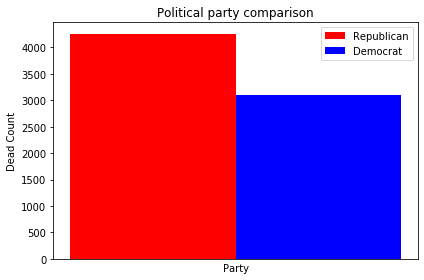

In [430]:
objects = 1
fig, ax = plt.subplots()
index = np.arange(objects)
bar_width = 0.35

b1 = plt.bar(index,R,bar_width,color='r',label='Republican')
b2 = plt.bar(index+bar_width,D,bar_width,color='b',label='Democrat')
plt.xlabel('Party')
plt.ylabel('Dead Count')
plt.title('Political party comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [436]:
#  think it would be intereting to know the numbers by State as well. 
state_count = excelKillings['state'].value_counts()
state_count

CA    1228
TX     757
FL     576
AZ     364
GA     285
CO     254
WA     231
OK     229
OH     227
NC     221
MO     216
TN     192
IL     186
PA     183
NY     170
LA     160
AL     150
NM     147
NV     137
IN     137
MD     136
VA     134
KY     129
SC     127
MI     123
OR     121
WI     121
AR     115
MS     110
NJ     108
MN      89
UT      87
KS      77
WV      73
MA      58
ID      53
AK      47
IA      47
MT      46
CT      40
HI      39
NE      38
ME      34
DC      26
SD      26
DE      21
WY      21
NH      18
ND      13
VT      12
RI       6
Name: state, dtype: int64

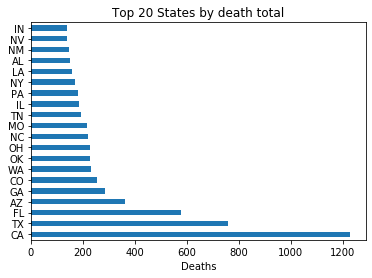

In [484]:
plt.xlabel('Deaths')
plt.title('Top 20 States by death total')
excelKillings['state'].value_counts()[:20].plot(kind='barh') #  top 20 killings by State

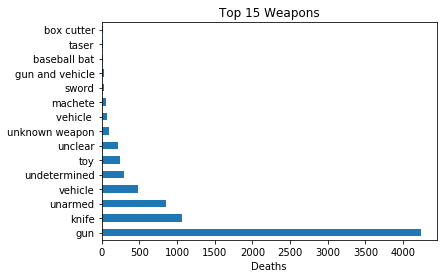

In [483]:
plt.xlabel('Deaths')
plt.title('Top 15 Weapons')
excelKillings['weapon'].value_counts()[:15].plot(kind='barh') #  top 20 weapons used

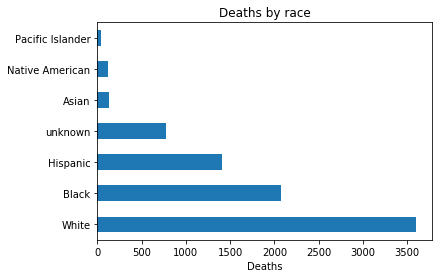

In [480]:
plt.xlabel('Deaths')
plt.title('Deaths by race')
excelKillings['race'].value_counts().plot(kind='barh')   #  top Races that commit crimes

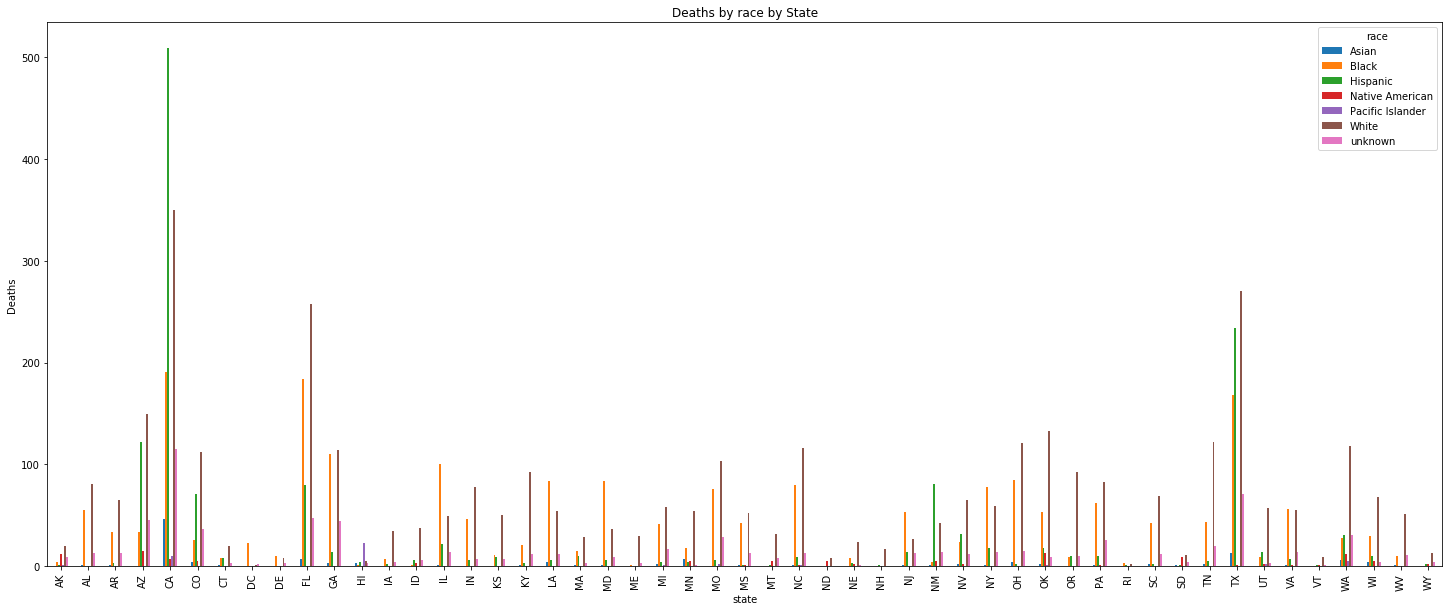

In [478]:
# plot data
fig, ax = plt.subplots(figsize=(25,10))
plt.ylabel('Deaths')
plt.title('Deaths by race by State')
# use unstack()
excelKillings.groupby(['state','race']).count()['party'].unstack().plot.bar(ax=ax)


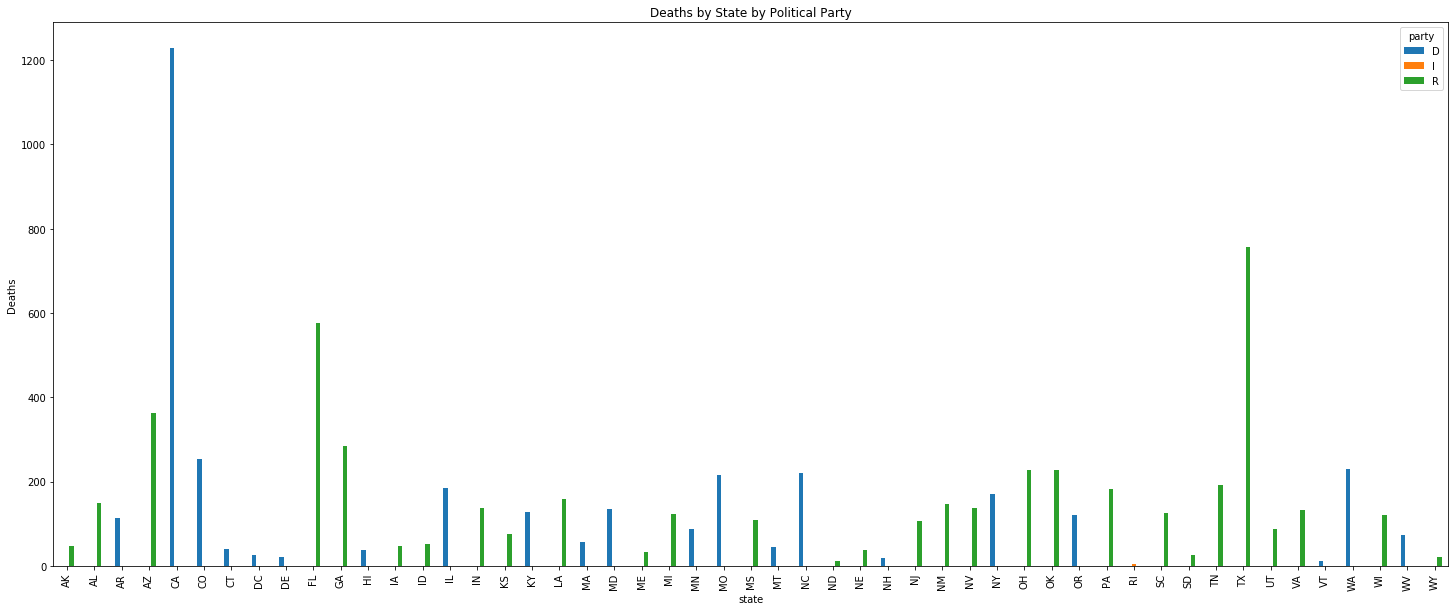

In [477]:
# plot data
fig, ax = plt.subplots(figsize=(25,10))
plt.ylabel('Deaths')
plt.title('Deaths by State by Political Party')
# use unstack()
excelKillings.groupby(['state','party']).count()['race'].unstack().plot.bar(ax=ax)